In [7]:
import sys

import numpy as np
import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
from tensorflow.keras.preprocessing.image import *
import matplotlib.pyplot as plt
from tensorflow.keras import models

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

Tensor Flow Version: 2.1.0
Keras Version: 2.2.4-tf

Python 3.7.7 (default, Mar 23 2020, 23:19:08) [MSC v.1916 64 bit (AMD64)]
Pandas 1.0.3
Scikit-Learn 0.22.1
GPU is available


In [2]:
import os
import zipfile
import random
import shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd

In [3]:
def split_data(src, train, test, split_size):
    files = []
    for filename in os.listdir(src):
        file = src + filename
        if os.path.getsize(file)>0:
            files.append(filename)
        else:
            print(filename  +'ignore because zero length')
            
    training_length = int(len(files)*split_size)
    testing_length = int(len(files) - training_length)
    shuffled_set  =random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]
    
    for filename in training_set:
        this_file = src + filename
        destination = train + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = src + filename
        destination = test  + filename
        copyfile(this_file, destination)
        
    

In [4]:
CAT_SRC_DIR = 'dogs-vs-cats/cats/'
TRAINING_cats = 'dogs-vs-cats/training/cats/'
TESTING_cats = 'dogs-vs-cats/testing/cats/'

In [5]:
DOG_SRC_DIR = 'dogs-vs-cats/dogs/'
TRAINING_dogs = 'dogs-vs-cats/training/dogs/'
TESTING_dogs = 'dogs-vs-cats/testing/dogs/'

In [14]:
split_size = 0.9
split_data(CAT_SRC_DIR, TRAINING_cats, TESTING_cats, split_size)
split_data(DOG_SRC_DIR, TRAINING_dogs, TESTING_dogs, split_size)


In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.ZeroPadding2D((2,2), input_shape=(300, 300, 3)),

    tf.keras.layers.Conv2D(32, (3,3)),
    #tf.keras.layers.BatchNormalization(axis = -1),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3)),
    #tf.keras.layers.BatchNormalization(axis = -1),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(2,2), 

    tf.keras.layers.Conv2D(128, (3,3)), 
    #tf.keras.layers.BatchNormalization(axis = -1),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3)), 
    #tf.keras.layers.BatchNormalization(axis = -1),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 304, 304, 3)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 302, 302, 32)      896       
_________________________________________________________________
activation_4 (Activation)    (None, 302, 302, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 151, 151, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 149, 149, 64)      18496     
_________________________________________________________________
activation_5 (Activation)    (None, 149, 149, 64)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 64)       

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [13]:
#Image Pre-procssing
TRAIN_DIR = 'dogs-vs-cats/training'
TESTING_DIR = 'dogs-vs-cats/testing'
train_datagen = ImageDataGenerator(rescale=1/255, 
                                   rotation_range=40,
                                   horizontal_flip=True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   fill_mode='nearest')

test_datagen =ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(TRAIN_DIR,
                                                    batch_size=50,
                                                    class_mode='binary',
                                                    target_size=(300,300))

test_generator = test_datagen.flow_from_directory(TESTING_DIR,
                                                  batch_size=50,
                                                  class_mode = 'binary',
                                                  target_size=(300, 300))


Found 23623 images belonging to 2 classes.
Found 3625 images belonging to 2 classes.


In [15]:
history = model.fit(train_generator, 
                  validation_data=test_generator,
                  steps_per_epoch=100,
                  epochs=10,
                  validation_steps=50,
                  verbose=1)

# The Model has been trained for 20 epochs


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/10
100/100 [==============================] - 122s 1s/step - loss: 0.5443 - accuracy: 0.7230 - val_loss: 0.4658 - val_accuracy: 0.7876

In [16]:
model.save('cat-v-dogs.h5')
model = models.load_model('cat-v-dogs.h5')

My Image shape:  (1, 300, 300, 3)
[1.]
 is a dog


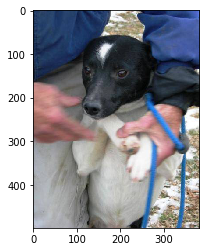

In [17]:
img_path = 'images/1.jpg'
img = load_img(img_path, target_size=(300,300))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

print('My Image shape: ', x.shape)
image = plt.imread(img_path)
plt.imshow(image)
classes= model.predict(x)
print(classes[0])
  
if classes[0]>0:
    print(" is a dog")
    
else:
    print(" is a cat")